<a href="https://colab.research.google.com/github/sarmilasaha123/Project/blob/main/CropPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # analyze data 
import csv # implements classes to read & write tabulated data in CSV format

In [ ]:
from google.colab import files
uploaded = files.upload() # uploading data set

Saving cdata2.csv to cdata2.csv


In [ ]:
import io
crop = pd.read_csv(io.BytesIO(uploaded['cdata2.csv']))
print(crop)

         Area  Production     GDP  Annual Growth Rate (%)  Inflation  \
0         102         321   33668                  0.0030     0.0401   
1          83         300   34352                  0.0186     0.0378   
2         189         511   35796                  0.0430     0.0430   
3          52          90   41572                  0.1608     0.0381   
4          53          73   47728                  0.1482     0.0377   
...       ...         ...     ...                     ...        ...   
15099     516        1274  110200                  0.0040     0.1106   
15100  302274      730136  110200                  0.0040     0.1106   
15101     264         721  119624                  0.0857     0.0665   
15102     306         801  119624                  0.0857     0.0665   
15103  279151      597899  119624                  0.0857     0.0665   

       Rainfall  Price  Temparature  
0        2763.2   1139        26.60  
1        3080.9    864        26.85  
2        2620.2    96

In [ ]:
crop.head() # show first five data points

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature
0,102,321,33668,0.0030,0.0401,2763.2,1139,26.60
1,83,300,34352,0.0186,0.0378,3080.9,864,26.85
2,189,511,35796,0.0430,0.0430,2620.2,964,27.00
3,52,90,41572,0.1608,0.0381,2355.9,945,27.30
4,53,73,47728,0.1482,0.0377,2460.1,1309,27.35


In [ ]:
crop.info() # dataset statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    15104 non-null  int64  
 1   Production              15104 non-null  int64  
 2   GDP                     15104 non-null  int64  
 3   Annual Growth Rate (%)  15104 non-null  float64
 4   Inflation               15104 non-null  float64
 5   Rainfall                15104 non-null  float64
 6   Price                   15104 non-null  int64  
 7   Temparature             14396 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 944.1 KB


In [ ]:
crop['Price'].value_counts() # show value of particular variable

1009    1701
1284     939
1094     923
1309     895
1030     866
1494     866
1139     861
1575     856
1110     850
1250     844
945      844
964      820
1345     803
864      791
939      790
1425     768
968      607
1560      80
Name: Price, dtype: int64

In [ ]:
crop['Area'].value_counts()

1000      136
2000       69
1          62
3000       56
2          44
         ... 
45158       1
45729       1
46036       1
46453       1
279151      1
Name: Area, Length: 10759, dtype: int64

In [ ]:
crop.describe() # describes dataset

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature
count,15104.000000,1.510400e+04,15104.000000,15104.000000,15104.000000,15104.000000,15104.000000,14396.000000
mean,49465.391817,1.062944e+05,69083.542108,0.089930,0.072745,1615.374378,1159.730535,24.894815
std,68790.684941,1.738664e+05,31723.555039,0.087498,0.031243,938.528063,205.872234,3.075868
min,1.000000,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,864.000000,12.210000
25%,3298.750000,4.964750e+03,35796.000000,0.004000,0.042500,926.500000,968.000000,23.940000
50%,18888.000000,3.041250e+04,61332.000000,0.074100,0.066500,1291.900000,1110.000000,25.760000
75%,72741.750000,1.350475e+05,103208.000000,0.148200,0.093100,2372.200000,1309.000000,26.750000
max,687000.000000,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,1575.000000,30.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f8ee0c510>,
      dtype=object)

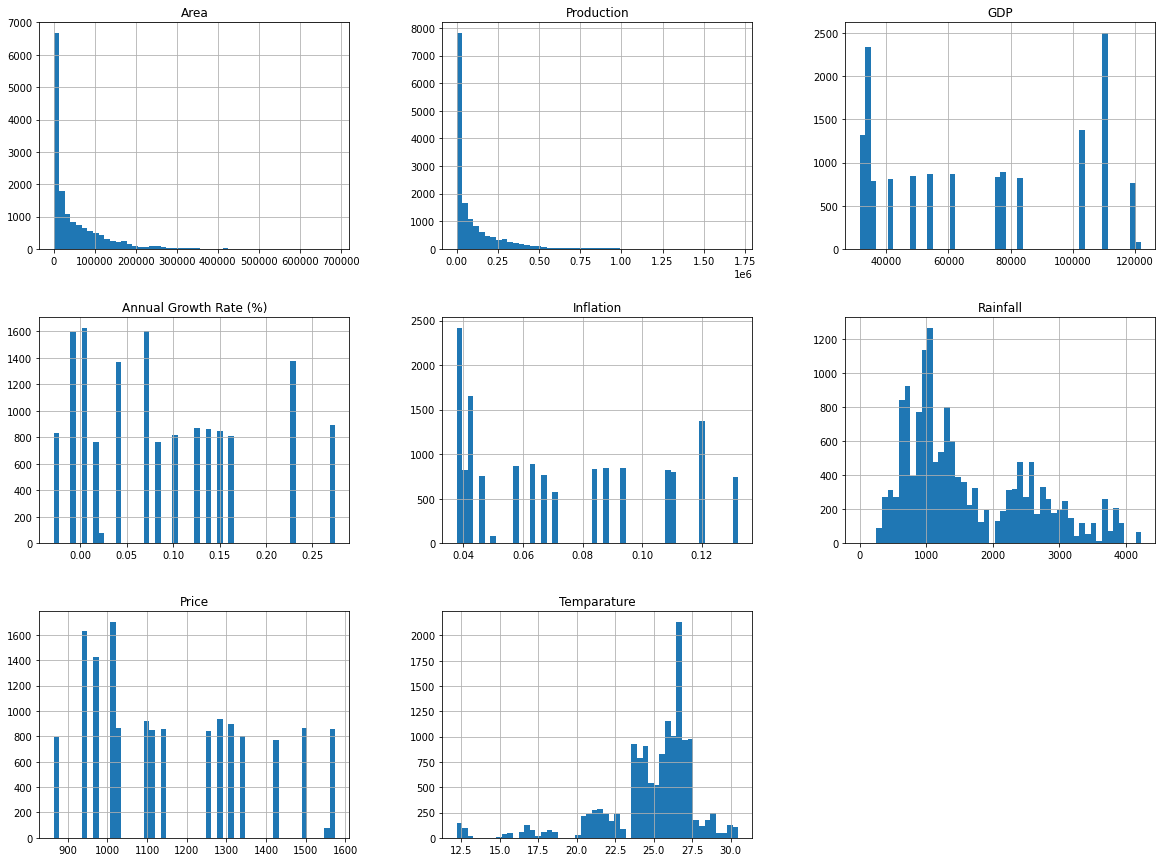

In [ ]:
import matplotlib.pyplot as plt # for plotting histograms
crop.hist(bins=50, figsize=(20, 15)) # bins - column(singular), figsize - allows us to specify the width and height of a figure in unit inches.
# %matplotlib inline # to see graphs

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(crop, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 12083
Rows in test set: 3021



In [ ]:
import numpy as np
crop.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [ ]:
crop.fillna(999, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(crop, crop['Price']): 
    strat_train_set = crop.loc[train_index] 
    strat_test_set = crop.loc[test_index]

In [ ]:
strat_train_set['Temparature'].value_counts()

999.00    568
26.71     175
26.75     152
25.90     142
26.70     139
         ... 
25.91       1
26.25       1
25.70       1
27.05       1
26.79       1
Name: Temparature, Length: 344, dtype: int64

In [ ]:
crop=strat_train_set.copy()

In [ ]:
corr_matrix = crop.corr() 
corr_matrix['Price'].sort_values(ascending=False) 

Price                     1.000000
GDP                       0.563084
Inflation                 0.263704
Production                0.014140
Area                     -0.005611
Rainfall                 -0.018843
Temparature              -0.019152
Annual Growth Rate (%)   -0.047775
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f81783a50>,
      dtype=object)

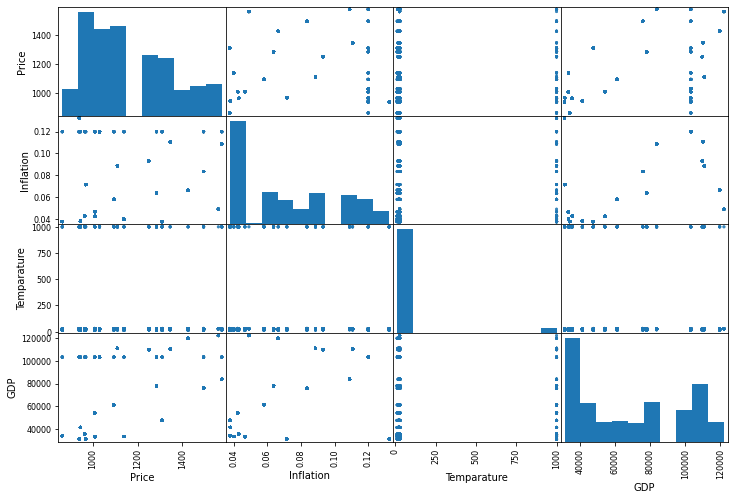

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "Inflation", "Temparature", "GDP"]
scatter_matrix(crop[attributes], figsize = (12,8))

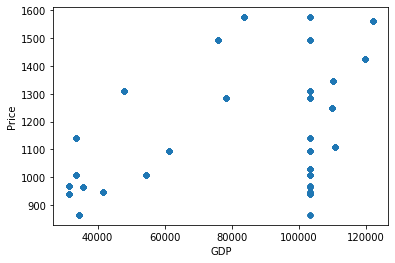

In [ ]:
crop.plot(kind="scatter", x="GDP", y="Price", alpha=0.8)

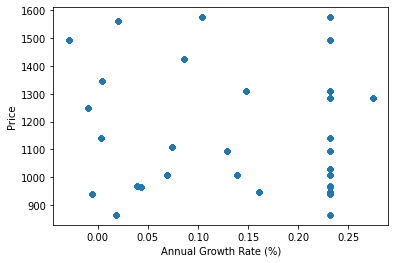

In [ ]:
crop.plot(kind="scatter", x="Annual Growth Rate (%)", y="Price", alpha=0.8)

In [ ]:
crop["prod"] = crop['Production']/crop['Area']

In [ ]:
crop.head()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Price,Temparature,prod
5130,4152,3241,47728,0.1482,0.0377,1136.6,1309,999.00,0.780588
590,406,574,110808,0.0741,0.0886,2193.7,1110,22.75,1.413793
5681,20948,47154,83752,0.1036,0.1088,3862.0,1575,24.25,2.251002
4022,314482,411096,34352,0.0186,0.0378,1600.1,864,26.50,1.307216
315,44700,133400,31388,-0.0053,0.1323,948.1,939,29.10,2.984340


In [ ]:
crop = strat_train_set.drop("Price", axis=1)   
crop_labels = strat_train_set["Price"].copy()  

In [ ]:
#a = crop.dropna(subset=["#]) #Option 1
#a.shape
# Note that the original housing dataframe will remain unchanged

In [ ]:
#crop.drop("Temparature", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

In [ ]:
median = crop["Temparature"].median() # Compute median for Option 3

In [ ]:
crop["Temparature"].fillna(median)

5130     999.00
590       22.75
5681      24.25
4022      26.50
315       29.10
          ...  
10470     27.50
13057     26.65
9569      27.45
14031     20.60
13784     26.10
Name: Temparature, Length: 12083, dtype: float64

In [ ]:
crop.shape

(12083, 7)

In [ ]:
crop.describe() 

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Temparature
count,12083.000000,1.208300e+04,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,49666.206157,1.064325e+05,69092.793181,0.090035,0.072749,1620.501332,70.682480
std,69045.095812,1.740927e+05,31732.355530,0.087550,0.031245,939.898697,206.206547
min,1.000000,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,12.210000
25%,3331.000000,4.998500e+03,35796.000000,0.004000,0.042500,927.900000,24.000000
50%,19000.000000,3.041600e+04,61332.000000,0.074100,0.066500,1291.900000,25.850000
75%,73254.000000,1.346525e+05,103208.000000,0.148200,0.093100,2389.200000,26.820000
max,687000.000000,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,999.000000


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(crop)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([1.9000e+04, 3.0416e+04, 6.1332e+04, 7.4100e-02, 6.6500e-02,
       1.2919e+03, 2.5850e+01])

In [ ]:
X = imputer.transform(crop)

In [ ]:
crop_tr = pd.DataFrame(X, columns=crop.columns)

In [ ]:
crop_tr.describe()

,Area,Production,GDP,Annual Growth Rate (%),Inflation,Rainfall,Temparature
count,12083.000000,1.208300e+04,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,49666.206157,1.064325e+05,69092.793181,0.090035,0.072749,1620.501332,70.682480
std,69045.095812,1.740927e+05,31732.355530,0.087550,0.031245,939.898697,206.206547
min,1.000000,0.000000e+00,31388.000000,-0.029000,0.037700,0.000000,12.210000
25%,3331.000000,4.998500e+03,35796.000000,0.004000,0.042500,927.900000,24.000000
50%,19000.000000,3.041600e+04,61332.000000,0.074100,0.066500,1291.900000,25.850000
75%,73254.000000,1.346525e+05,103208.000000,0.148200,0.093100,2389.200000,26.820000
max,687000.000000,1.710000e+06,122056.000000,0.274700,0.132300,4229.400000,999.000000


In [ ]:
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import StandardScaler 
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [ ]:
crop_num_tr = my_pipeline.fit_transform(crop)

In [ ]:
crop_num_tr.shape

(12083, 7)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
#odel = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
#model = SVC()
model.fit(crop_num_tr, crop_labels)

RandomForestRegressor()

In [ ]:
some_data = crop.iloc[:5]

In [ ]:
some_labels =crop_labels.iloc[:5]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

array([1309., 1110., 1575.,  864.,  939.])

In [ ]:
list(some_labels)

[1309, 1110, 1575, 864, 939]

In [ ]:
from sklearn.metrics import mean_squared_error
crop_predictions = model.predict(crop_num_tr)
mse = mean_squared_error(crop_labels, crop_predictions)
rmse = np.sqrt(mse) 

In [ ]:
rmse # 1.5701592196881597

1.6115309117420384

In [ ]:
# 1 2 3 4 5 6 7 8 9 10  
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, crop_num_tr, crop_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([8.41020762, 6.66340282, 4.17720975, 3.53378672, 3.46590676,
       2.81748241, 3.57068207, 3.34716381, 2.97387606, 5.54140275])

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

Scores: [8.41020762 6.66340282 4.17720975 3.53378672 3.46590676 2.81748241
 3.57068207 3.34716381 2.97387606 5.54140275]
Mean:  4.450112077244851
Standard deviation:  1.7461202804630747


In [ ]:
from joblib import dump, load
dump(model,'data')

['data']

In [ ]:
X_test = strat_test_set.drop("Price", axis=1) 
Y_test = strat_test_set["Price"].copy() 
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[1425. 1309.  968. ... 1009. 1425. 1284.] [1425, 1309, 968, 1030, 1009, 1009, 1139, 1494, 1030, 1009, 1094, 1575, 964, 1309, 1030, 1284, 1139, 1110, 1094, 1309, 1309, 964, 1250, 1494, 1345, 1110, 1425, 1030, 1030, 864, 1110, 1250, 968, 964, 1250, 1494, 1425, 964, 1110, 1284, 939, 964, 1309, 1030, 1284, 1309, 1575, 1575, 1094, 945, 1284, 1030, 945, 1494, 864, 1575, 1250, 1345, 1030, 1425, 1494, 1575, 968, 1425, 1009, 1139, 1094, 1009, 1425, 964, 939, 1139, 945, 1575, 945, 1284, 864, 964, 1009, 968, 1094, 1575, 1110, 1494, 968, 1009, 1110, 1009, 1575, 864, 1009, 1094, 1110, 1009, 1094, 1425, 1560, 1575, 1094, 968, 968, 1110, 1009, 1309, 1030, 1110, 1009, 1110, 864, 1030, 1494, 1009, 1030, 1284, 1110, 964, 939, 1250, 1110, 1309, 1094, 1560, 968, 1110, 1494, 945, 1345, 1110, 1009, 1575, 1250, 939, 1345, 1030, 1030, 1030, 1345, 964, 1345, 1425, 1494, 1094, 864, 1094, 1009, 1009, 1425, 1309, 964, 1494, 1009, 1345, 1009, 1575, 1575, 1094, 1425, 939, 1139, 1494, 1110, 1345, 1139, 1494, 1009, 1

In [ ]:
final_rmse

4.12750754534844

In [ ]:
prepared_data[4] 

array([-0.07192997,  0.15490956, -1.18826204, -1.08896724,  1.90601146,
       -0.71542727, -0.20166285])

In [ ]:
from joblib import dump, load
import numpy as np
model = load('data')
features = np.array([[-0.07192997,  0.15490956, -1.18826204, -1.08896724,  1.90601146,
       -0.71542727, -0.20166285]])
model.predict(features)

array([939.])

In [ ]:
##import pandas as pd
import csv
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from joblib import dump, load
